In [30]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',parse_dates=['Quarter'],index_col=0)
df.head()

<IPython.core.display.Javascript object>

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [5]:
df.shape

(42, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [23]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

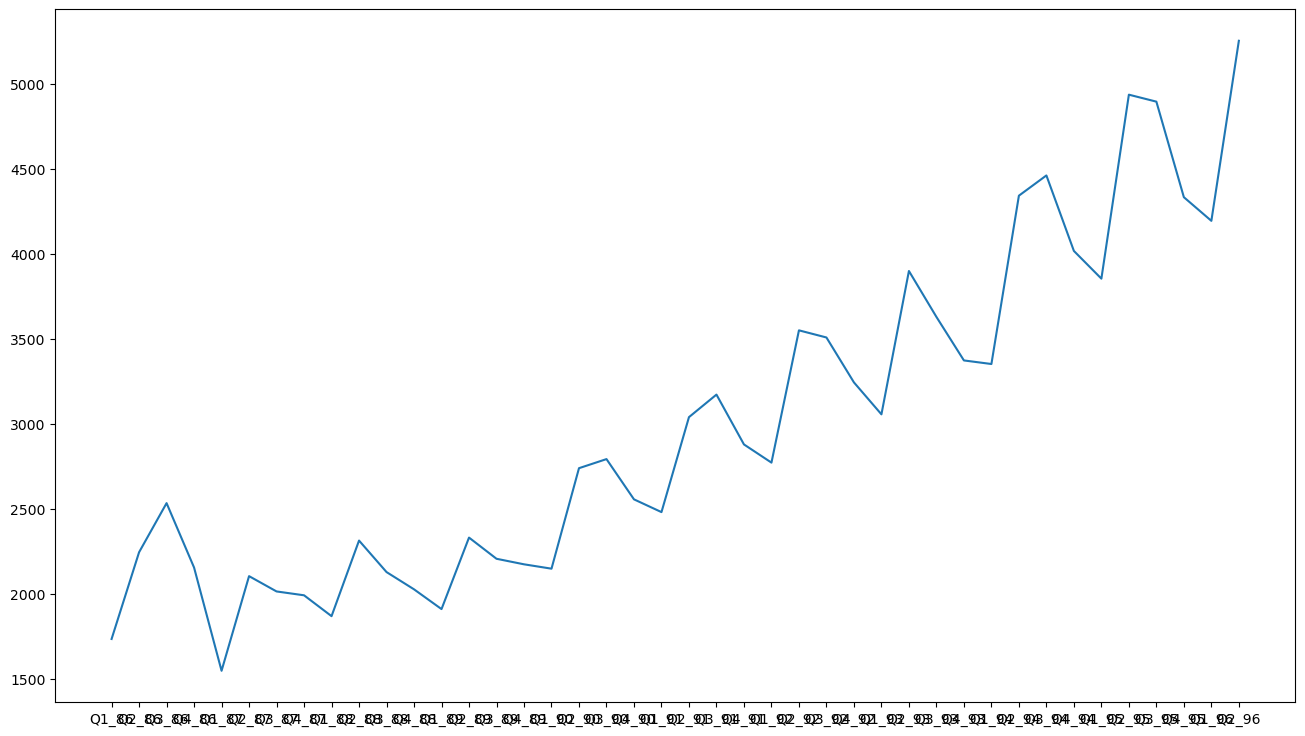

In [24]:
plt.figure(figsize=(16,9))
plt.plot(df)

<IPython.core.display.Javascript object>

<AxesSubplot: ylabel='Density'>

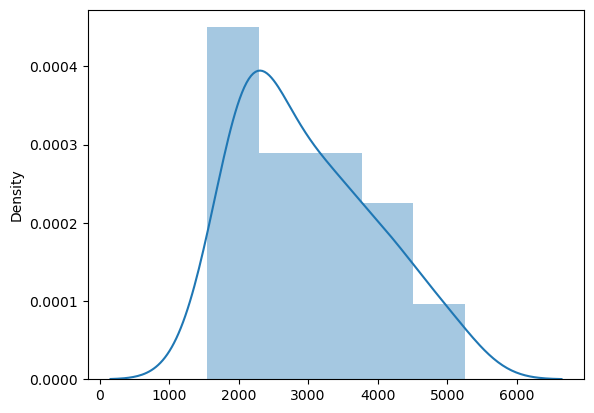

In [32]:
sns.distplot(df)

<IPython.core.display.Javascript object>

<AxesSubplot: ylabel='Density'>

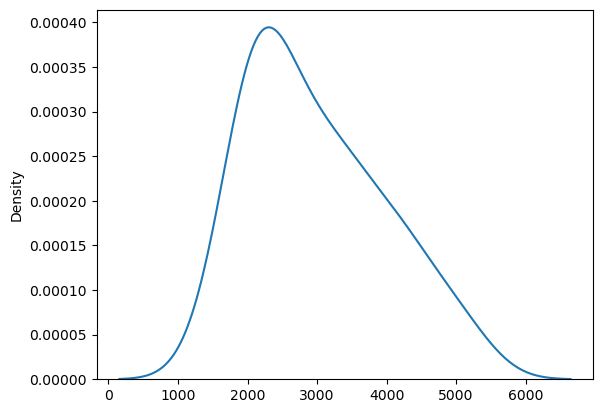

In [31]:
sns.distplot(df,kde=True,hist=False)

<IPython.core.display.Javascript object>

<AxesSubplot: >

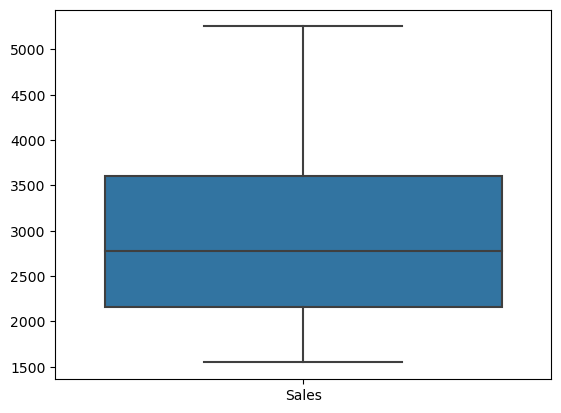

In [35]:
sns.boxplot(df)

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

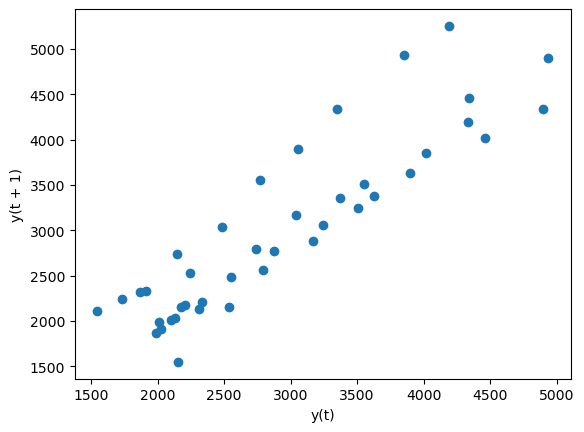

In [36]:
pd.plotting.lag_plot(df)

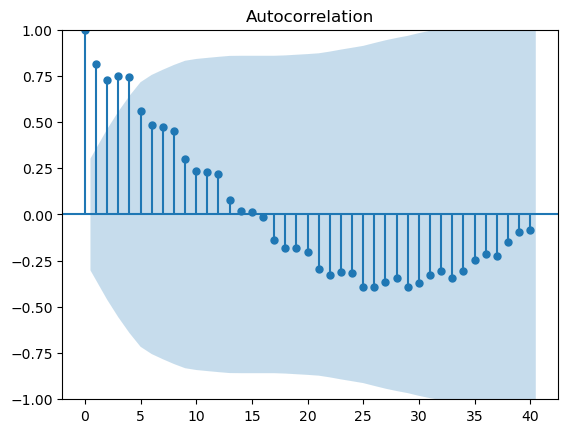

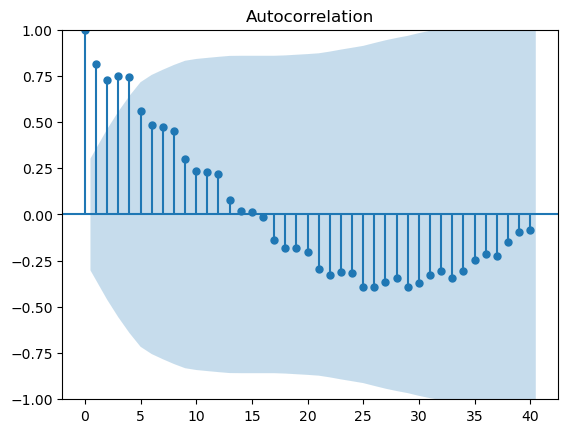

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df,lags=40)

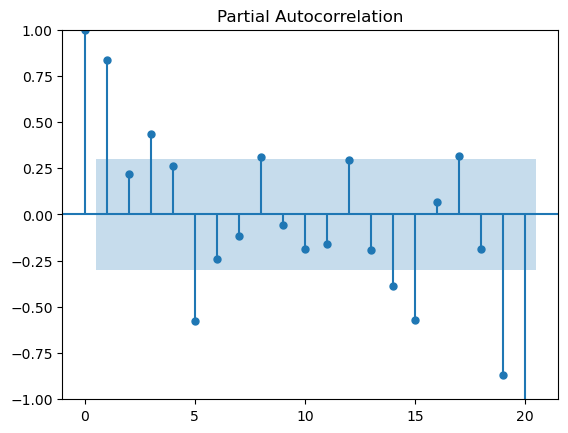

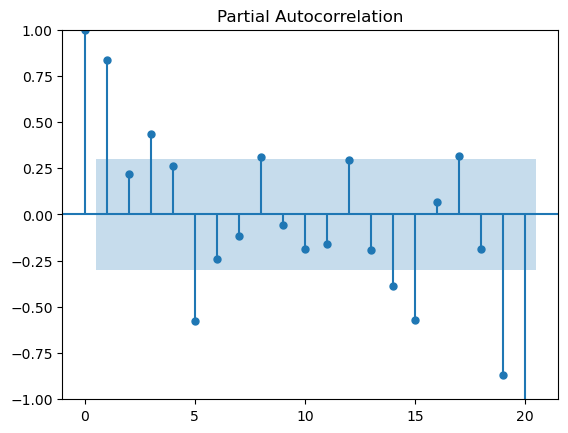

In [44]:
plot_pacf(df,lags=20)

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='Sales'>

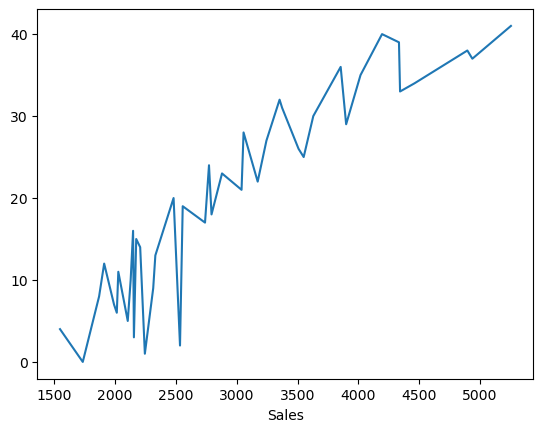

In [48]:
sns.lineplot(data=df,x='Sales',y=range(0,len(df)))

In [82]:
df['t'] = range(1,len(df)+1)
df['t_sqr'] = df['t']**2
df['log_sales'] = np.log(df['Sales'])
df

<IPython.core.display.Javascript object>

,Sales,t,t_sqr,log_sales
Quarter,,,,
Q1_86,1734.827000,1,1,7.458663
Q2_86,2244.960999,2,4,7.716443
Q3_86,2533.804993,3,9,7.837477
Q4_86,2154.962997,4,16,7.675529
Q1_87,1547.818996,5,25,7.344602
Q2_87,2104.411995,6,36,7.651791
Q3_87,2014.362999,7,49,7.608058
Q4_87,1991.746998,8,64,7.596767
Q1_88,1869.049999,9,81,7.533186


In [60]:
train = df.head(34)
test = df.tail(8)

In [75]:
import statsmodels.formula.api as smf
# linear model
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(test['t']))
rmse_linear = np.sqrt(np.mean(((test['t'])-(pred_linear))**2))
rmse_linear

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3866.5810418700617

In [87]:
# sqr model
sqr_model = smf.ols('Sales~t_sqr',data=train).fit()
pred_sqr = pd.Series(sqr_model.predict(test['t_sqr']))
rmse_sqr = np.sqrt(np.mean(((test['t_sqr'])-(pred_sqr))**2))
rmse_sqr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3037.823417936251

In [88]:
# log model
log_model = smf.ols('log_sales ~ t',data=train).fit()
pred_log = pd.Series(log_model.predict(test['t']))
rmse_log = np.sqrt(np.mean(((test['t'])-(pred_log))**2))
rmse_log

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

30.26565097208189

In [90]:
# poly model
poly_model = smf.ols('Sales ~ t+t_sqr',data=train).fit()
pred_poly = pd.Series(poly_model.predict(test[['t','t_sqr']]))
rmse_poly = np.sqrt(np.mean(((test['t'])-(pred_poly))**2))
rmse_poly

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4582.600959497451

In [92]:
comparison = pd.DataFrame({'model':['linear_model','sqr_model','log_model','poly_model'],'rmse':[3866.6,3037.83,30.27,4582.6]})
comparison

<IPython.core.display.Javascript object>

,model,rmse
0,linear_model,3866.60
1,sqr_model,3037.83
2,log_model,30.27
3,poly_model,4582.60


In [ ]:
# log modelyielded the best results so far i.e. "log_sales vs t" with rmse = 30.27

In [109]:
pred_sales = []
for i in range(len(df)):
    pred_sales.append(df.iloc[i-1,0])

df['pred_sales'] = pred_sales
df.iloc[0,-1] = 0
df

,Sales,t,t_sqr,log_sales,pred_sales
Quarter,,,,,
Q1_86,1734.827000,1,1,7.458663,0.000000
Q2_86,2244.960999,2,4,7.716443,1734.827000
Q3_86,2533.804993,3,9,7.837477,2244.960999
Q4_86,2154.962997,4,16,7.675529,2533.804993
Q1_87,1547.818996,5,25,7.344602,2154.962997
Q2_87,2104.411995,6,36,7.651791,1547.818996
Q3_87,2014.362999,7,49,7.608058,2104.411995
Q4_87,1991.746998,8,64,7.596767,2014.362999
Q1_88,1869.049999,9,81,7.533186,1991.746998


In [112]:
rmse= np.sqrt(np.mean(np.abs(df['Sales']-df['pred_sales'])))
rmse

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

18.943096470021352

### As data is not stationary, instead of making data stationary, I am not applying ARIMA model

# from above analysis it is concluded that log model ""log_sales vs t" with rmse = 30.27" have least RMSE

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # Single Exponential Smoothing
from statsmodels.tsa.holtwinters import Holt # Holts (Double) Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #Holt Winter's (Triple) Exponential Smoothing 

In [1]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

<IPython.core.display.Javascript object>

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [2]:
train = df.head(35)
test = df.tail(7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

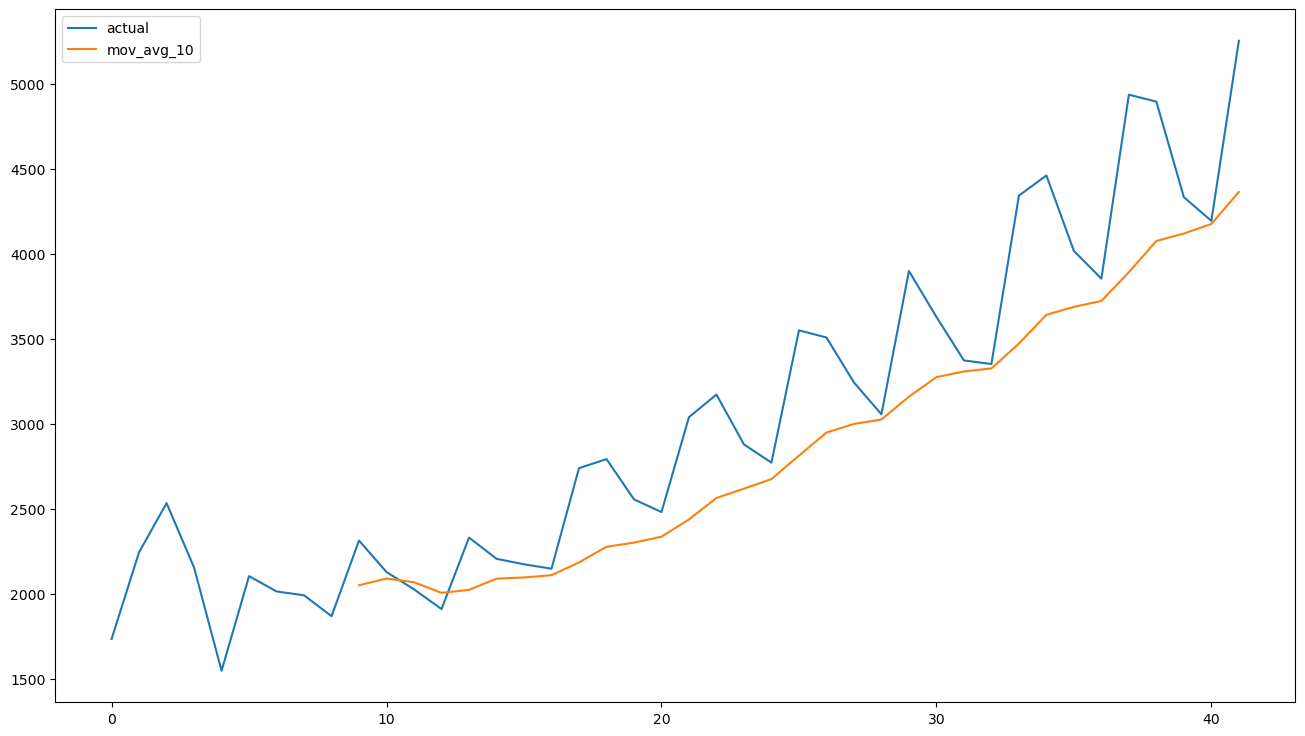

In [3]:
plt.figure(figsize=(16,9))
df['Sales'].plot(label='actual')
df['Sales'].rolling(10).mean().plot(label='mov_avg_10')
plt.legend(loc='upper left')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

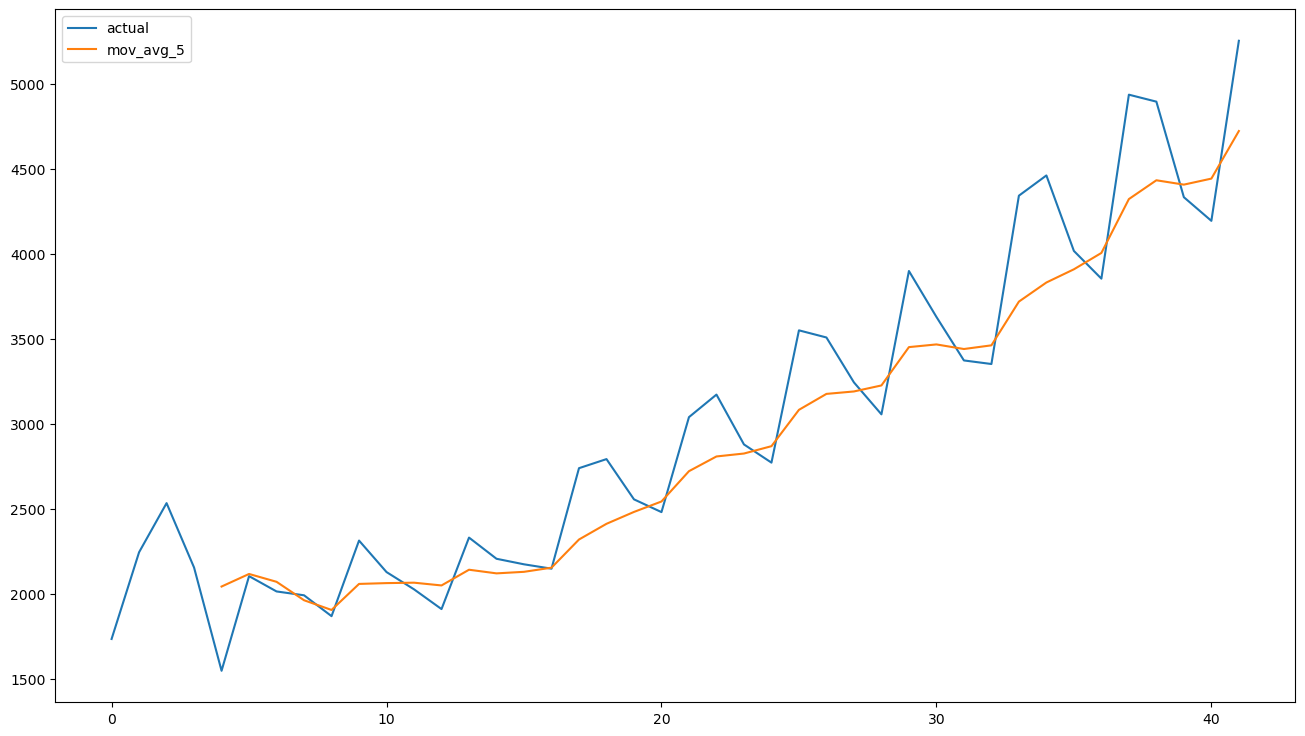

In [4]:
plt.figure(figsize=(16,9))
df['Sales'].plot(label='actual')
df['Sales'].rolling(5).mean().plot(label='mov_avg_5')
plt.legend(loc='upper left')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

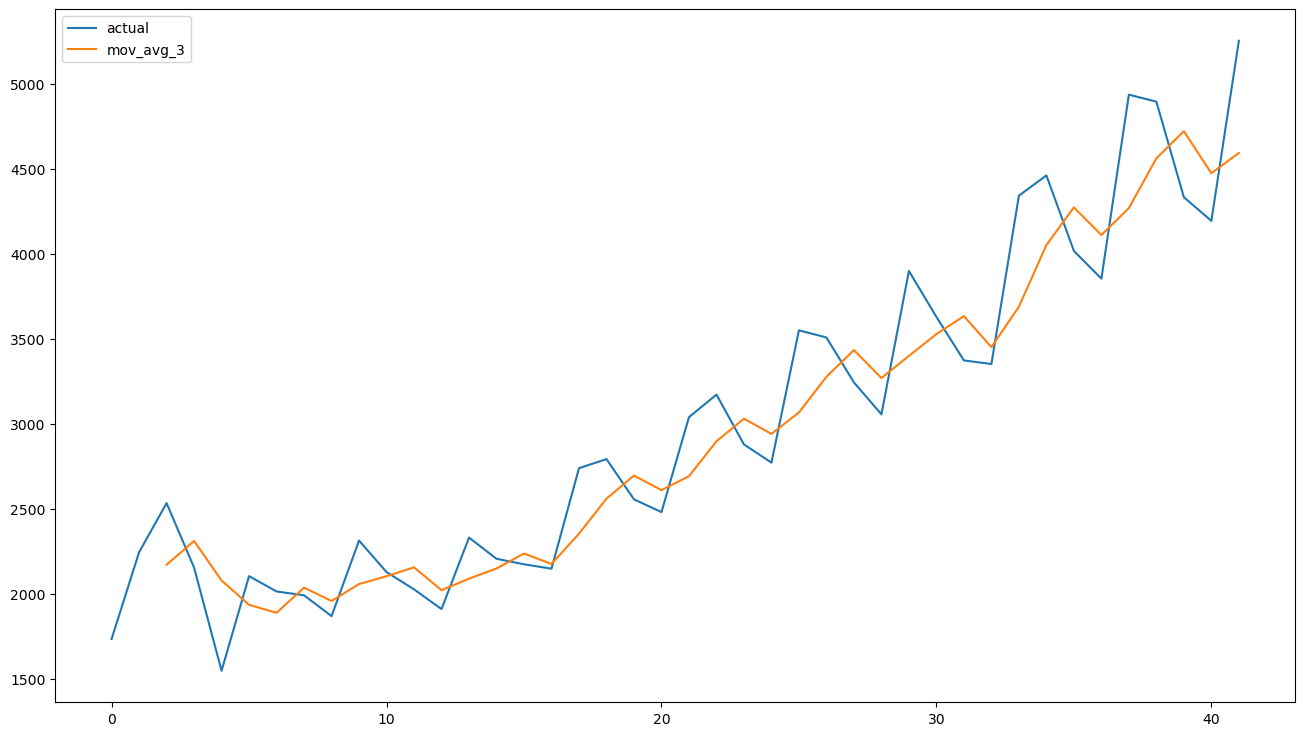

In [5]:
plt.figure(figsize=(16,9))
df['Sales'].plot(label='actual')
df['Sales'].rolling(3).mean().plot(label='mov_avg_3')
plt.legend(loc='upper left')

In [6]:
def mape(pred,org):
    result = np.mean(np.abs(pred-org)/org)*100
    return result
    

In [9]:
sim_exp = SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.85)
sim_exp_pred = sim_exp.predict(start=test.index[0],end=test.index[-1])
mape(sim_exp_pred,test['Sales'])

9.738776030339292

In [10]:
holt_model = Holt(train['Sales']).fit(smoothing_level=0.85,smoothing_trend=0.2)
holt_pred = holt_model.predict(start=test.index[0],end=test.index[-1])
mape(holt_pred,test['Sales'])

16.427615543498206

In [11]:
exp_smooth_add = ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=12).fit()
exp_smooth_pred_add = exp_smooth_add.predict(start=test.index[0],end=test.index[-1])
mape(exp_smooth_pred_add,test['Sales'])

5.308475130916447

In [12]:
exp_smooth_mul = ExponentialSmoothing(train['Sales'],seasonal='mul',trend='add',seasonal_periods=12).fit()
exp_smooth_pred_mul = exp_smooth_mul.predict(start=test.index[0],end=test.index[-1])
mape(exp_smooth_pred_mul,test['Sales'])

4.688998255188625

# exponential smoothing with multiplicative seasonality and additive trend resulted in least percentage error i.e. 4.69%